# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/522213'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-06 02:53:35.032159: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 02:53:35.047914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 02:53:35.063769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 02:53:35.068642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 02:53:35.097959: I tensorflow/core/platform/cpu_feature_guar

2024-10-06 02:53:38.478498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "amazon", sample_size=100_000
)

Loading train tensors:   0%|          | 0/196 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/196 [00:03<09:46,  3.01s/it]

Loading train tensors:   1%|          | 2/196 [00:06<09:45,  3.02s/it]

Loading train tensors:   2%|▏         | 3/196 [00:09<09:40,  3.01s/it]

Loading train tensors:   2%|▏         | 4/196 [00:12<09:36,  3.00s/it]

Loading train tensors:   3%|▎         | 5/196 [00:15<09:34,  3.01s/it]

Loading train tensors:   3%|▎         | 6/196 [00:18<09:32,  3.02s/it]

Loading train tensors:   4%|▎         | 7/196 [00:21<09:30,  3.02s/it]

Loading train tensors:   4%|▍         | 8/196 [00:24<09:27,  3.02s/it]

Loading train tensors:   5%|▍         | 9/196 [00:27<09:21,  3.00s/it]

Loading train tensors:   5%|▌         | 10/196 [00:30<09:17,  3.00s/it]

Loading train tensors:   6%|▌         | 11/196 [00:33<09:13,  2.99s/it]

Loading train tensors:   6%|▌         | 12/196 [00:36<09:09,  2.98s/it]

Loading train tensors:   7%|▋         | 13/196 [00:38<09:04,  2.98s/it]

Loading train tensors:   7%|▋         | 14/196 [00:41<09:00,  2.97s/it]

Loading train tensors:   8%|▊         | 15/196 [00:44<08:53,  2.95s/it]

Loading train tensors:   8%|▊         | 16/196 [00:47<08:47,  2.93s/it]

Loading train tensors:   9%|▊         | 17/196 [00:50<08:48,  2.95s/it]

Loading train tensors:   9%|▉         | 18/196 [00:53<08:47,  2.97s/it]

Loading train tensors:  10%|▉         | 19/196 [00:56<08:43,  2.96s/it]

Loading train tensors:  10%|█         | 20/196 [00:59<08:45,  2.98s/it]

Loading train tensors:  11%|█         | 21/196 [01:02<08:43,  2.99s/it]

Loading train tensors:  11%|█         | 22/196 [01:05<08:42,  3.00s/it]

Loading train tensors:  12%|█▏        | 23/196 [01:08<08:39,  3.00s/it]

Loading train tensors:  12%|█▏        | 24/196 [01:11<08:37,  3.01s/it]

Loading train tensors:  13%|█▎        | 25/196 [01:14<08:33,  3.00s/it]

Loading train tensors:  13%|█▎        | 26/196 [01:17<08:32,  3.01s/it]

Loading train tensors:  14%|█▍        | 27/196 [01:20<08:26,  3.00s/it]

Loading train tensors:  14%|█▍        | 28/196 [01:23<08:24,  3.00s/it]

Loading train tensors:  15%|█▍        | 29/196 [01:26<08:18,  2.99s/it]

Loading train tensors:  15%|█▌        | 30/196 [01:29<08:19,  3.01s/it]

Loading train tensors:  16%|█▌        | 31/196 [01:32<08:13,  2.99s/it]

Loading train tensors:  16%|█▋        | 32/196 [01:35<08:06,  2.97s/it]

Loading train tensors:  17%|█▋        | 33/196 [01:38<07:58,  2.94s/it]

Loading train tensors:  17%|█▋        | 34/196 [01:41<07:56,  2.94s/it]

Loading train tensors:  18%|█▊        | 35/196 [01:44<07:51,  2.93s/it]

Loading train tensors:  18%|█▊        | 36/196 [01:47<07:48,  2.93s/it]

Loading train tensors:  19%|█▉        | 37/196 [01:50<07:45,  2.93s/it]

Loading train tensors:  19%|█▉        | 38/196 [01:53<07:44,  2.94s/it]

Loading train tensors:  20%|█▉        | 39/196 [01:56<07:39,  2.93s/it]

Loading train tensors:  20%|██        | 40/196 [01:58<07:36,  2.93s/it]

Loading train tensors:  21%|██        | 41/196 [02:01<07:33,  2.93s/it]

Loading train tensors:  21%|██▏       | 42/196 [02:04<07:29,  2.92s/it]

Loading train tensors:  22%|██▏       | 43/196 [02:07<07:24,  2.91s/it]

Loading train tensors:  22%|██▏       | 44/196 [02:10<07:23,  2.92s/it]

Loading train tensors:  23%|██▎       | 45/196 [02:13<07:20,  2.91s/it]

Loading train tensors:  23%|██▎       | 46/196 [02:16<07:18,  2.92s/it]

Loading train tensors:  24%|██▍       | 47/196 [02:19<07:15,  2.93s/it]

Loading train tensors:  24%|██▍       | 48/196 [02:22<07:12,  2.93s/it]

Loading train tensors:  25%|██▌       | 49/196 [02:25<07:10,  2.93s/it]

Loading train tensors:  26%|██▌       | 50/196 [02:28<07:06,  2.92s/it]

Loading train tensors:  26%|██▌       | 51/196 [02:31<07:04,  2.93s/it]

Loading train tensors:  27%|██▋       | 52/196 [02:34<07:01,  2.92s/it]

Loading train tensors:  27%|██▋       | 53/196 [02:36<06:58,  2.92s/it]

Loading train tensors:  28%|██▊       | 54/196 [02:39<06:54,  2.92s/it]

Loading train tensors:  28%|██▊       | 55/196 [02:42<06:52,  2.92s/it]

Loading train tensors:  29%|██▊       | 56/196 [02:45<06:49,  2.93s/it]

Loading train tensors:  29%|██▉       | 57/196 [02:48<06:48,  2.94s/it]

Loading train tensors:  30%|██▉       | 58/196 [02:51<06:46,  2.95s/it]

Loading train tensors:  30%|███       | 59/196 [02:54<06:43,  2.95s/it]

Loading train tensors:  31%|███       | 60/196 [02:57<06:42,  2.96s/it]

Loading train tensors:  31%|███       | 61/196 [03:00<06:40,  2.96s/it]

Loading train tensors:  32%|███▏      | 62/196 [03:03<06:37,  2.97s/it]

Loading train tensors:  32%|███▏      | 63/196 [03:06<06:32,  2.95s/it]

Loading train tensors:  33%|███▎      | 64/196 [03:09<06:29,  2.95s/it]

Loading train tensors:  33%|███▎      | 65/196 [03:12<06:27,  2.96s/it]

Loading train tensors:  34%|███▎      | 66/196 [03:15<06:23,  2.95s/it]

Loading train tensors:  34%|███▍      | 67/196 [03:18<06:20,  2.95s/it]

Loading train tensors:  35%|███▍      | 68/196 [03:21<06:16,  2.94s/it]

Loading train tensors:  35%|███▌      | 69/196 [03:24<06:12,  2.93s/it]

Loading train tensors:  36%|███▌      | 70/196 [03:27<06:08,  2.93s/it]

Loading train tensors:  36%|███▌      | 71/196 [03:29<06:04,  2.92s/it]

Loading train tensors:  37%|███▋      | 72/196 [03:32<06:01,  2.92s/it]

Loading train tensors:  37%|███▋      | 73/196 [03:35<05:58,  2.92s/it]

Loading train tensors:  38%|███▊      | 74/196 [03:38<05:56,  2.92s/it]

Loading train tensors:  38%|███▊      | 75/196 [03:41<05:53,  2.92s/it]

Loading train tensors:  39%|███▉      | 76/196 [03:44<05:51,  2.93s/it]

Loading train tensors:  39%|███▉      | 77/196 [03:47<05:48,  2.93s/it]

Loading train tensors:  40%|███▉      | 78/196 [03:50<05:46,  2.94s/it]

Loading train tensors:  40%|████      | 79/196 [03:53<05:43,  2.93s/it]

Loading train tensors:  41%|████      | 80/196 [03:56<05:39,  2.92s/it]

Loading train tensors:  41%|████▏     | 81/196 [03:59<05:36,  2.92s/it]

Loading train tensors:  42%|████▏     | 82/196 [04:02<05:34,  2.93s/it]

Loading train tensors:  42%|████▏     | 83/196 [04:05<05:30,  2.93s/it]

Loading train tensors:  43%|████▎     | 84/196 [04:07<05:26,  2.92s/it]

Loading train tensors:  43%|████▎     | 85/196 [04:10<05:22,  2.91s/it]

Loading train tensors:  44%|████▍     | 86/196 [04:13<05:19,  2.91s/it]

Loading train tensors:  44%|████▍     | 87/196 [04:16<05:17,  2.91s/it]

Loading train tensors:  45%|████▍     | 88/196 [04:19<05:13,  2.90s/it]

Loading train tensors:  45%|████▌     | 89/196 [04:22<05:11,  2.91s/it]

Loading train tensors:  46%|████▌     | 90/196 [04:25<05:09,  2.92s/it]

Loading train tensors:  46%|████▋     | 91/196 [04:28<05:07,  2.92s/it]

Loading train tensors:  47%|████▋     | 92/196 [04:31<05:04,  2.93s/it]

Loading train tensors:  47%|████▋     | 93/196 [04:34<05:01,  2.93s/it]

Loading train tensors:  48%|████▊     | 94/196 [04:37<04:58,  2.93s/it]

Loading train tensors:  48%|████▊     | 95/196 [04:40<04:58,  2.95s/it]

Loading train tensors:  49%|████▉     | 96/196 [04:43<04:54,  2.95s/it]

Loading train tensors:  49%|████▉     | 97/196 [04:46<04:51,  2.94s/it]

Loading train tensors:  50%|█████     | 98/196 [04:49<04:49,  2.95s/it]

Loading train tensors:  51%|█████     | 99/196 [04:51<04:47,  2.96s/it]

Loading train tensors:  51%|█████     | 100/196 [04:54<04:44,  2.96s/it]

Loading train tensors:  52%|█████▏    | 101/196 [04:57<04:40,  2.95s/it]

Loading train tensors:  52%|█████▏    | 102/196 [05:00<04:36,  2.94s/it]

Loading train tensors:  53%|█████▎    | 103/196 [05:03<04:32,  2.93s/it]

Loading train tensors:  53%|█████▎    | 104/196 [05:06<04:30,  2.94s/it]

Loading train tensors:  54%|█████▎    | 105/196 [05:09<04:26,  2.93s/it]

Loading train tensors:  54%|█████▍    | 106/196 [05:12<04:24,  2.94s/it]

Loading train tensors:  55%|█████▍    | 107/196 [05:15<04:23,  2.96s/it]

Loading train tensors:  55%|█████▌    | 108/196 [05:18<04:21,  2.97s/it]

Loading train tensors:  56%|█████▌    | 109/196 [05:21<04:19,  2.98s/it]

Loading train tensors:  56%|█████▌    | 110/196 [05:24<04:17,  3.00s/it]

Loading train tensors:  57%|█████▋    | 111/196 [05:27<04:13,  2.98s/it]

Loading train tensors:  57%|█████▋    | 112/196 [05:30<04:10,  2.98s/it]

Loading train tensors:  58%|█████▊    | 113/196 [05:33<04:07,  2.98s/it]

Loading train tensors:  58%|█████▊    | 114/196 [05:36<04:04,  2.98s/it]

Loading train tensors:  59%|█████▊    | 115/196 [05:39<04:00,  2.97s/it]

Loading train tensors:  59%|█████▉    | 116/196 [05:42<03:57,  2.97s/it]

Loading train tensors:  60%|█████▉    | 117/196 [05:45<03:53,  2.96s/it]

Loading train tensors:  60%|██████    | 118/196 [05:48<03:50,  2.96s/it]

Loading train tensors:  61%|██████    | 119/196 [05:51<03:47,  2.95s/it]

Loading train tensors:  61%|██████    | 120/196 [05:54<03:43,  2.94s/it]

Loading train tensors:  62%|██████▏   | 121/196 [05:57<03:40,  2.94s/it]

Loading train tensors:  62%|██████▏   | 122/196 [05:59<03:36,  2.93s/it]

Loading train tensors:  63%|██████▎   | 123/196 [06:02<03:33,  2.93s/it]

Loading train tensors:  63%|██████▎   | 124/196 [06:05<03:30,  2.93s/it]

Loading train tensors:  64%|██████▍   | 125/196 [06:08<03:27,  2.92s/it]

Loading train tensors:  64%|██████▍   | 126/196 [06:11<03:24,  2.92s/it]

Loading train tensors:  65%|██████▍   | 127/196 [06:14<03:21,  2.92s/it]

Loading train tensors:  65%|██████▌   | 128/196 [06:17<03:19,  2.93s/it]

Loading train tensors:  66%|██████▌   | 129/196 [06:20<03:16,  2.93s/it]

Loading train tensors:  66%|██████▋   | 130/196 [06:23<03:13,  2.94s/it]

Loading train tensors:  67%|██████▋   | 131/196 [06:26<03:10,  2.94s/it]

Loading train tensors:  67%|██████▋   | 132/196 [06:29<03:07,  2.93s/it]

Loading train tensors:  68%|██████▊   | 133/196 [06:32<03:04,  2.93s/it]

Loading train tensors:  68%|██████▊   | 134/196 [06:35<03:01,  2.94s/it]

Loading train tensors:  69%|██████▉   | 135/196 [06:38<02:58,  2.93s/it]

Loading train tensors:  69%|██████▉   | 136/196 [06:41<02:56,  2.95s/it]

Loading train tensors:  70%|██████▉   | 137/196 [06:43<02:54,  2.95s/it]

Loading train tensors:  70%|███████   | 138/196 [06:46<02:51,  2.96s/it]

Loading train tensors:  71%|███████   | 139/196 [06:49<02:48,  2.96s/it]

Loading train tensors:  71%|███████▏  | 140/196 [06:52<02:45,  2.96s/it]

Loading train tensors:  72%|███████▏  | 141/196 [06:55<02:42,  2.95s/it]

Loading train tensors:  72%|███████▏  | 142/196 [06:58<02:38,  2.94s/it]

Loading train tensors:  73%|███████▎  | 143/196 [07:01<02:35,  2.93s/it]

Loading train tensors:  73%|███████▎  | 144/196 [07:04<02:31,  2.92s/it]

Loading train tensors:  74%|███████▍  | 145/196 [07:07<02:28,  2.91s/it]

Loading train tensors:  74%|███████▍  | 146/196 [07:10<02:26,  2.92s/it]

Loading train tensors:  75%|███████▌  | 147/196 [07:13<02:23,  2.92s/it]

Loading train tensors:  76%|███████▌  | 148/196 [07:16<02:20,  2.92s/it]

Loading train tensors:  76%|███████▌  | 149/196 [07:19<02:17,  2.93s/it]

Loading train tensors:  77%|███████▋  | 150/196 [07:22<02:15,  2.94s/it]

Loading train tensors:  77%|███████▋  | 151/196 [07:25<02:13,  2.96s/it]

Loading train tensors:  78%|███████▊  | 152/196 [07:28<02:10,  2.96s/it]

Loading train tensors:  78%|███████▊  | 153/196 [07:31<02:07,  2.97s/it]

Loading train tensors:  79%|███████▊  | 154/196 [07:34<02:04,  2.97s/it]

Loading train tensors:  79%|███████▉  | 155/196 [07:37<02:01,  2.97s/it]

Loading train tensors:  80%|███████▉  | 156/196 [07:39<01:58,  2.95s/it]

Loading train tensors:  80%|████████  | 157/196 [07:42<01:54,  2.93s/it]

Loading train tensors:  81%|████████  | 158/196 [07:45<01:51,  2.94s/it]

Loading train tensors:  81%|████████  | 159/196 [07:48<01:48,  2.93s/it]

Loading train tensors:  82%|████████▏ | 160/196 [07:51<01:45,  2.93s/it]

Loading train tensors:  82%|████████▏ | 161/196 [07:54<01:42,  2.93s/it]

Loading train tensors:  83%|████████▎ | 162/196 [07:57<01:39,  2.93s/it]

Loading train tensors:  83%|████████▎ | 163/196 [08:00<01:36,  2.92s/it]

Loading train tensors:  84%|████████▎ | 164/196 [08:03<01:33,  2.93s/it]

Loading train tensors:  84%|████████▍ | 165/196 [08:06<01:30,  2.92s/it]

Loading train tensors:  85%|████████▍ | 166/196 [08:09<01:27,  2.92s/it]

Loading train tensors:  85%|████████▌ | 167/196 [08:12<01:25,  2.94s/it]

Loading train tensors:  86%|████████▌ | 168/196 [08:15<01:22,  2.94s/it]

Loading train tensors:  86%|████████▌ | 169/196 [08:18<01:19,  2.94s/it]

Loading train tensors:  87%|████████▋ | 170/196 [08:21<01:16,  2.95s/it]

Loading train tensors:  87%|████████▋ | 171/196 [08:23<01:13,  2.94s/it]

Loading train tensors:  88%|████████▊ | 172/196 [08:26<01:10,  2.94s/it]

Loading train tensors:  88%|████████▊ | 173/196 [08:29<01:07,  2.93s/it]

Loading train tensors:  89%|████████▉ | 174/196 [08:32<01:04,  2.93s/it]

Loading train tensors:  89%|████████▉ | 175/196 [08:35<01:01,  2.93s/it]

Loading train tensors:  90%|████████▉ | 176/196 [08:38<00:58,  2.92s/it]

Loading train tensors:  90%|█████████ | 177/196 [08:41<00:55,  2.94s/it]

Loading train tensors:  91%|█████████ | 178/196 [08:44<00:52,  2.94s/it]

Loading train tensors:  91%|█████████▏| 179/196 [08:47<00:49,  2.93s/it]

Loading train tensors:  92%|█████████▏| 180/196 [08:50<00:46,  2.93s/it]

Loading train tensors:  92%|█████████▏| 181/196 [08:53<00:43,  2.93s/it]

Loading train tensors:  93%|█████████▎| 182/196 [08:56<00:40,  2.92s/it]

Loading train tensors:  93%|█████████▎| 183/196 [08:59<00:38,  2.96s/it]

Loading train tensors:  94%|█████████▍| 184/196 [09:02<00:35,  2.98s/it]

Loading train tensors:  94%|█████████▍| 185/196 [09:05<00:32,  2.97s/it]

Loading train tensors:  95%|█████████▍| 186/196 [09:08<00:29,  2.97s/it]

Loading train tensors:  95%|█████████▌| 187/196 [09:11<00:26,  2.96s/it]

Loading train tensors:  96%|█████████▌| 188/196 [09:14<00:23,  2.96s/it]

Loading train tensors:  96%|█████████▋| 189/196 [09:17<00:20,  2.99s/it]

Loading train tensors:  97%|█████████▋| 190/196 [09:20<00:17,  3.00s/it]

Loading train tensors:  97%|█████████▋| 191/196 [09:23<00:14,  2.98s/it]

Loading train tensors:  98%|█████████▊| 192/196 [09:26<00:12,  3.02s/it]

Loading train tensors:  98%|█████████▊| 193/196 [09:29<00:09,  3.03s/it]

Loading train tensors:  99%|█████████▉| 194/196 [09:32<00:06,  3.03s/it]

Loading train tensors:  99%|█████████▉| 195/196 [09:35<00:02,  3.00s/it]

Loading train tensors: 100%|██████████| 196/196 [09:36<00:00,  2.38s/it]

Loading train tensors: 100%|██████████| 196/196 [09:36<00:00,  2.94s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/196 [00:00<?, ?it/s]

Loading val tensors:   1%|          | 1/196 [00:03<11:14,  3.46s/it]

Loading val tensors:   1%|          | 2/196 [00:06<11:02,  3.41s/it]

Loading val tensors:   2%|▏         | 3/196 [00:10<10:51,  3.38s/it]

Loading val tensors:   2%|▏         | 4/196 [00:13<10:53,  3.41s/it]

Loading val tensors:   3%|▎         | 5/196 [00:17<10:49,  3.40s/it]

Loading val tensors:   3%|▎         | 6/196 [00:20<10:45,  3.40s/it]

Loading val tensors:   4%|▎         | 7/196 [00:23<10:23,  3.30s/it]

Loading val tensors:   4%|▍         | 8/196 [00:26<10:07,  3.23s/it]

Loading val tensors:   5%|▍         | 9/196 [00:29<09:53,  3.17s/it]

Loading val tensors:   5%|▌         | 10/196 [00:32<09:41,  3.13s/it]

Loading val tensors:   6%|▌         | 11/196 [00:35<09:34,  3.11s/it]

Loading val tensors:   6%|▌         | 12/196 [00:38<09:30,  3.10s/it]

Loading val tensors:   7%|▋         | 13/196 [00:41<09:26,  3.10s/it]

Loading val tensors:   7%|▋         | 14/196 [00:45<09:26,  3.11s/it]

Loading val tensors:   8%|▊         | 15/196 [00:48<09:23,  3.11s/it]

Loading val tensors:   8%|▊         | 16/196 [00:51<09:18,  3.10s/it]

Loading val tensors:   9%|▊         | 17/196 [00:54<09:16,  3.11s/it]

Loading val tensors:   9%|▉         | 18/196 [00:57<09:13,  3.11s/it]

Loading val tensors:  10%|▉         | 19/196 [01:00<09:06,  3.09s/it]

Loading val tensors:  10%|█         | 20/196 [01:03<08:58,  3.06s/it]

Loading val tensors:  11%|█         | 21/196 [01:06<08:53,  3.05s/it]

Loading val tensors:  11%|█         | 22/196 [01:09<08:43,  3.01s/it]

Loading val tensors:  12%|█▏        | 23/196 [01:12<08:38,  2.99s/it]

Loading val tensors:  12%|█▏        | 24/196 [01:15<08:33,  2.98s/it]

Loading val tensors:  13%|█▎        | 25/196 [01:18<08:28,  2.97s/it]

Loading val tensors:  13%|█▎        | 26/196 [01:21<08:23,  2.96s/it]

Loading val tensors:  14%|█▍        | 27/196 [01:24<08:23,  2.98s/it]

Loading val tensors:  14%|█▍        | 28/196 [01:27<08:41,  3.10s/it]

Loading val tensors:  15%|█▍        | 29/196 [01:31<08:56,  3.21s/it]

Loading val tensors:  15%|█▌        | 30/196 [01:34<08:59,  3.25s/it]

Loading val tensors:  16%|█▌        | 31/196 [01:37<09:02,  3.28s/it]

Loading val tensors:  16%|█▋        | 32/196 [01:41<09:05,  3.32s/it]

Loading val tensors:  17%|█▋        | 33/196 [01:44<09:04,  3.34s/it]

Loading val tensors:  17%|█▋        | 34/196 [01:48<09:04,  3.36s/it]

Loading val tensors:  18%|█▊        | 35/196 [01:51<09:01,  3.36s/it]

Loading val tensors:  18%|█▊        | 36/196 [01:54<08:55,  3.35s/it]

Loading val tensors:  19%|█▉        | 37/196 [01:58<08:50,  3.34s/it]

Loading val tensors:  19%|█▉        | 38/196 [02:01<08:48,  3.34s/it]

Loading val tensors:  20%|█▉        | 39/196 [02:04<08:41,  3.32s/it]

Loading val tensors:  20%|██        | 40/196 [02:07<08:35,  3.31s/it]

Loading val tensors:  21%|██        | 41/196 [02:11<08:28,  3.28s/it]

Loading val tensors:  21%|██▏       | 42/196 [02:14<08:26,  3.29s/it]

Loading val tensors:  22%|██▏       | 43/196 [02:17<08:27,  3.32s/it]

Loading val tensors:  22%|██▏       | 44/196 [02:21<08:27,  3.34s/it]

Loading val tensors:  23%|██▎       | 45/196 [02:24<08:23,  3.34s/it]

Loading val tensors:  23%|██▎       | 46/196 [02:27<08:21,  3.34s/it]

Loading val tensors:  24%|██▍       | 47/196 [02:31<08:15,  3.32s/it]

Loading val tensors:  24%|██▍       | 48/196 [02:34<08:11,  3.32s/it]

Loading val tensors:  25%|██▌       | 49/196 [02:37<08:02,  3.28s/it]

Loading val tensors:  26%|██▌       | 50/196 [02:40<07:58,  3.28s/it]

Loading val tensors:  26%|██▌       | 51/196 [02:44<07:54,  3.27s/it]

Loading val tensors:  27%|██▋       | 52/196 [02:47<07:51,  3.28s/it]

Loading val tensors:  27%|██▋       | 53/196 [02:50<07:45,  3.26s/it]

Loading val tensors:  28%|██▊       | 54/196 [02:54<07:46,  3.28s/it]

Loading val tensors:  28%|██▊       | 55/196 [02:57<07:46,  3.31s/it]

Loading val tensors:  29%|██▊       | 56/196 [03:00<07:46,  3.33s/it]

Loading val tensors:  29%|██▉       | 57/196 [03:04<07:44,  3.34s/it]

Loading val tensors:  30%|██▉       | 58/196 [03:07<07:37,  3.32s/it]

Loading val tensors:  30%|███       | 59/196 [03:10<07:30,  3.29s/it]

Loading val tensors:  31%|███       | 60/196 [03:13<07:26,  3.28s/it]

Loading val tensors:  31%|███       | 61/196 [03:17<07:24,  3.29s/it]

Loading val tensors:  32%|███▏      | 62/196 [03:20<07:21,  3.30s/it]

Loading val tensors:  32%|███▏      | 63/196 [03:23<07:17,  3.29s/it]

Loading val tensors:  33%|███▎      | 64/196 [03:27<07:14,  3.29s/it]

Loading val tensors:  33%|███▎      | 65/196 [03:30<07:10,  3.29s/it]

Loading val tensors:  34%|███▎      | 66/196 [03:33<07:10,  3.32s/it]

Loading val tensors:  34%|███▍      | 67/196 [03:37<07:06,  3.30s/it]

Loading val tensors:  35%|███▍      | 68/196 [03:40<07:01,  3.29s/it]

Loading val tensors:  35%|███▌      | 69/196 [03:43<07:06,  3.36s/it]

Loading val tensors:  36%|███▌      | 70/196 [03:47<07:04,  3.37s/it]

Loading val tensors:  36%|███▌      | 71/196 [03:50<06:59,  3.36s/it]

Loading val tensors:  37%|███▋      | 72/196 [03:53<06:59,  3.38s/it]

Loading val tensors:  37%|███▋      | 73/196 [03:57<06:54,  3.37s/it]

Loading val tensors:  38%|███▊      | 74/196 [04:00<06:48,  3.34s/it]

Loading val tensors:  38%|███▊      | 75/196 [04:03<06:42,  3.33s/it]

Loading val tensors:  39%|███▉      | 76/196 [04:07<06:37,  3.32s/it]

Loading val tensors:  39%|███▉      | 77/196 [04:10<06:31,  3.29s/it]

Loading val tensors:  40%|███▉      | 78/196 [04:13<06:24,  3.26s/it]

Loading val tensors:  40%|████      | 79/196 [04:16<06:19,  3.25s/it]

Loading val tensors:  41%|████      | 80/196 [04:20<06:15,  3.24s/it]

Loading val tensors:  41%|████▏     | 81/196 [04:23<06:11,  3.23s/it]

Loading val tensors:  42%|████▏     | 82/196 [04:26<06:06,  3.22s/it]

Loading val tensors:  42%|████▏     | 83/196 [04:29<06:04,  3.22s/it]

Loading val tensors:  43%|████▎     | 84/196 [04:32<06:03,  3.25s/it]

Loading val tensors:  43%|████▎     | 85/196 [04:36<06:01,  3.26s/it]

Loading val tensors:  44%|████▍     | 86/196 [04:39<05:59,  3.27s/it]

Loading val tensors:  44%|████▍     | 87/196 [04:42<05:56,  3.27s/it]

Loading val tensors:  45%|████▍     | 88/196 [04:46<05:55,  3.29s/it]

Loading val tensors:  45%|████▌     | 89/196 [04:49<05:53,  3.30s/it]

Loading val tensors:  46%|████▌     | 90/196 [04:52<05:50,  3.30s/it]

Loading val tensors:  46%|████▋     | 91/196 [04:56<05:47,  3.31s/it]

Loading val tensors:  47%|████▋     | 92/196 [04:59<05:44,  3.31s/it]

Loading val tensors:  47%|████▋     | 93/196 [05:02<05:38,  3.29s/it]

Loading val tensors:  48%|████▊     | 94/196 [05:06<05:36,  3.30s/it]

Loading val tensors:  48%|████▊     | 95/196 [05:09<05:33,  3.31s/it]

Loading val tensors:  49%|████▉     | 96/196 [05:12<05:33,  3.33s/it]

Loading val tensors:  49%|████▉     | 97/196 [05:16<05:28,  3.32s/it]

Loading val tensors:  50%|█████     | 98/196 [05:19<05:27,  3.34s/it]

Loading val tensors:  51%|█████     | 99/196 [05:22<05:24,  3.34s/it]

Loading val tensors:  51%|█████     | 100/196 [05:26<05:23,  3.37s/it]

Loading val tensors:  52%|█████▏    | 101/196 [05:29<05:19,  3.37s/it]

Loading val tensors:  52%|█████▏    | 102/196 [05:32<05:15,  3.36s/it]

Loading val tensors:  53%|█████▎    | 103/196 [05:36<05:11,  3.35s/it]

Loading val tensors:  53%|█████▎    | 104/196 [05:39<05:09,  3.36s/it]

Loading val tensors:  54%|█████▎    | 105/196 [05:42<05:04,  3.35s/it]

Loading val tensors:  54%|█████▍    | 106/196 [05:46<05:01,  3.35s/it]

Loading val tensors:  55%|█████▍    | 107/196 [05:49<04:55,  3.32s/it]

Loading val tensors:  55%|█████▌    | 108/196 [05:52<04:50,  3.30s/it]

Loading val tensors:  56%|█████▌    | 109/196 [05:56<04:46,  3.29s/it]

Loading val tensors:  56%|█████▌    | 110/196 [05:59<04:43,  3.29s/it]

Loading val tensors:  57%|█████▋    | 111/196 [06:02<04:38,  3.28s/it]

Loading val tensors:  57%|█████▋    | 112/196 [06:05<04:34,  3.27s/it]

Loading val tensors:  58%|█████▊    | 113/196 [06:09<04:30,  3.26s/it]

Loading val tensors:  58%|█████▊    | 114/196 [06:12<04:26,  3.25s/it]

Loading val tensors:  59%|█████▊    | 115/196 [06:15<04:22,  3.24s/it]

Loading val tensors:  59%|█████▉    | 116/196 [06:18<04:21,  3.27s/it]

Loading val tensors:  60%|█████▉    | 117/196 [06:22<04:17,  3.26s/it]

Loading val tensors:  60%|██████    | 118/196 [06:25<04:16,  3.29s/it]

Loading val tensors:  61%|██████    | 119/196 [06:28<04:12,  3.28s/it]

Loading val tensors:  61%|██████    | 120/196 [06:32<04:10,  3.30s/it]

Loading val tensors:  62%|██████▏   | 121/196 [06:35<04:08,  3.31s/it]

Loading val tensors:  62%|██████▏   | 122/196 [06:38<04:06,  3.33s/it]

Loading val tensors:  63%|██████▎   | 123/196 [06:42<04:03,  3.34s/it]

Loading val tensors:  63%|██████▎   | 124/196 [06:45<04:00,  3.34s/it]

Loading val tensors:  64%|██████▍   | 125/196 [06:48<03:57,  3.35s/it]

Loading val tensors:  64%|██████▍   | 126/196 [06:52<03:53,  3.34s/it]

Loading val tensors:  65%|██████▍   | 127/196 [06:55<03:51,  3.36s/it]

Loading val tensors:  65%|██████▌   | 128/196 [06:59<03:50,  3.39s/it]

Loading val tensors:  66%|██████▌   | 129/196 [07:02<03:45,  3.37s/it]

Loading val tensors:  66%|██████▋   | 130/196 [07:05<03:43,  3.38s/it]

Loading val tensors:  67%|██████▋   | 131/196 [07:09<03:38,  3.37s/it]

Loading val tensors:  67%|██████▋   | 132/196 [07:12<03:35,  3.37s/it]

Loading val tensors:  68%|██████▊   | 133/196 [07:15<03:31,  3.36s/it]

Loading val tensors:  68%|██████▊   | 134/196 [07:19<03:28,  3.36s/it]

Loading val tensors:  69%|██████▉   | 135/196 [07:22<03:24,  3.36s/it]

Loading val tensors:  69%|██████▉   | 136/196 [07:25<03:19,  3.32s/it]

Loading val tensors:  70%|██████▉   | 137/196 [07:29<03:15,  3.31s/it]

Loading val tensors:  70%|███████   | 138/196 [07:32<03:12,  3.31s/it]

Loading val tensors:  71%|███████   | 139/196 [07:35<03:08,  3.30s/it]

Loading val tensors:  71%|███████▏  | 140/196 [07:38<03:05,  3.30s/it]

Loading val tensors:  72%|███████▏  | 141/196 [07:42<03:02,  3.31s/it]

Loading val tensors:  72%|███████▏  | 142/196 [07:45<02:59,  3.32s/it]

Loading val tensors:  73%|███████▎  | 143/196 [07:48<02:56,  3.33s/it]

Loading val tensors:  73%|███████▎  | 144/196 [07:52<02:53,  3.34s/it]

Loading val tensors:  74%|███████▍  | 145/196 [07:55<02:50,  3.33s/it]

Loading val tensors:  74%|███████▍  | 146/196 [07:58<02:44,  3.30s/it]

Loading val tensors:  75%|███████▌  | 147/196 [08:02<02:42,  3.32s/it]

Loading val tensors:  76%|███████▌  | 148/196 [08:05<02:39,  3.33s/it]

Loading val tensors:  76%|███████▌  | 149/196 [08:08<02:36,  3.32s/it]

Loading val tensors:  77%|███████▋  | 150/196 [08:12<02:32,  3.31s/it]

Loading val tensors:  77%|███████▋  | 151/196 [08:15<02:29,  3.33s/it]

Loading val tensors:  78%|███████▊  | 152/196 [08:18<02:26,  3.32s/it]

Loading val tensors:  78%|███████▊  | 153/196 [08:22<02:22,  3.31s/it]

Loading val tensors:  79%|███████▊  | 154/196 [08:25<02:18,  3.30s/it]

Loading val tensors:  79%|███████▉  | 155/196 [08:28<02:14,  3.28s/it]

Loading val tensors:  80%|███████▉  | 156/196 [08:31<02:09,  3.25s/it]

Loading val tensors:  80%|████████  | 157/196 [08:35<02:06,  3.23s/it]

Loading val tensors:  81%|████████  | 158/196 [08:38<02:01,  3.20s/it]

Loading val tensors:  81%|████████  | 159/196 [08:41<01:57,  3.17s/it]

Loading val tensors:  82%|████████▏ | 160/196 [08:44<01:53,  3.15s/it]

Loading val tensors:  82%|████████▏ | 161/196 [08:47<01:49,  3.12s/it]

Loading val tensors:  83%|████████▎ | 162/196 [08:50<01:45,  3.10s/it]

Loading val tensors:  83%|████████▎ | 163/196 [08:53<01:41,  3.09s/it]

Loading val tensors:  84%|████████▎ | 164/196 [08:56<01:38,  3.08s/it]

Loading val tensors:  84%|████████▍ | 165/196 [08:59<01:34,  3.06s/it]

Loading val tensors:  85%|████████▍ | 166/196 [09:02<01:31,  3.05s/it]

Loading val tensors:  85%|████████▌ | 167/196 [09:05<01:28,  3.04s/it]

Loading val tensors:  86%|████████▌ | 168/196 [09:08<01:25,  3.04s/it]

Loading val tensors:  86%|████████▌ | 169/196 [09:11<01:22,  3.05s/it]

Loading val tensors:  87%|████████▋ | 170/196 [09:14<01:19,  3.04s/it]

Loading val tensors:  87%|████████▋ | 171/196 [09:17<01:16,  3.04s/it]

Loading val tensors:  88%|████████▊ | 172/196 [09:20<01:13,  3.05s/it]

Loading val tensors:  88%|████████▊ | 173/196 [09:23<01:10,  3.05s/it]

Loading val tensors:  89%|████████▉ | 174/196 [09:27<01:07,  3.07s/it]

Loading val tensors:  89%|████████▉ | 175/196 [09:30<01:04,  3.08s/it]

Loading val tensors:  90%|████████▉ | 176/196 [09:33<01:01,  3.07s/it]

Loading val tensors:  90%|█████████ | 177/196 [09:36<00:58,  3.05s/it]

Loading val tensors:  91%|█████████ | 178/196 [09:39<00:55,  3.06s/it]

Loading val tensors:  91%|█████████▏| 179/196 [09:42<00:52,  3.07s/it]

Loading val tensors:  92%|█████████▏| 180/196 [09:45<00:49,  3.09s/it]

Loading val tensors:  92%|█████████▏| 181/196 [09:48<00:46,  3.10s/it]

Loading val tensors:  93%|█████████▎| 182/196 [09:51<00:43,  3.09s/it]

Loading val tensors:  93%|█████████▎| 183/196 [09:54<00:39,  3.05s/it]

Loading val tensors:  94%|█████████▍| 184/196 [09:57<00:36,  3.06s/it]

Loading val tensors:  94%|█████████▍| 185/196 [10:00<00:33,  3.06s/it]

Loading val tensors:  95%|█████████▍| 186/196 [10:03<00:30,  3.06s/it]

Loading val tensors:  95%|█████████▌| 187/196 [10:07<00:27,  3.10s/it]

Loading val tensors:  96%|█████████▌| 188/196 [10:10<00:24,  3.12s/it]

Loading val tensors:  96%|█████████▋| 189/196 [10:13<00:22,  3.15s/it]

Loading val tensors:  97%|█████████▋| 190/196 [10:16<00:19,  3.20s/it]

Loading val tensors:  97%|█████████▋| 191/196 [10:20<00:16,  3.23s/it]

Loading val tensors:  98%|█████████▊| 192/196 [10:23<00:12,  3.24s/it]

Loading val tensors:  98%|█████████▊| 193/196 [10:26<00:09,  3.25s/it]

Loading val tensors:  99%|█████████▉| 194/196 [10:29<00:06,  3.23s/it]

Loading val tensors:  99%|█████████▉| 195/196 [10:33<00:03,  3.23s/it]

Loading val tensors: 100%|██████████| 196/196 [10:33<00:00,  2.56s/it]

Loading val tensors: 100%|██████████| 196/196 [10:33<00:00,  3.23s/it]

Loading test tensors:   0%|          | 0/131 [00:00<?, ?it/s]

Loading test tensors:   1%|          | 1/131 [00:02<06:18,  2.91s/it]

Loading test tensors:   2%|▏         | 2/131 [00:05<06:13,  2.90s/it]

Loading test tensors:   2%|▏         | 3/131 [00:08<06:06,  2.86s/it]

Loading test tensors:   3%|▎         | 4/131 [00:11<06:03,  2.86s/it]

Loading test tensors:   4%|▍         | 5/131 [00:14<05:58,  2.85s/it]

Loading test tensors:   5%|▍         | 6/131 [00:17<05:56,  2.85s/it]

Loading test tensors:   5%|▌         | 7/131 [00:20<05:59,  2.90s/it]

Loading test tensors:   6%|▌         | 8/131 [00:23<06:01,  2.94s/it]

Loading test tensors:   7%|▋         | 9/131 [00:26<06:01,  2.96s/it]

Loading test tensors:   8%|▊         | 10/131 [00:29<06:00,  2.98s/it]

Loading test tensors:   8%|▊         | 11/131 [00:32<06:00,  3.00s/it]

Loading test tensors:   9%|▉         | 12/131 [00:35<05:56,  2.99s/it]

Loading test tensors:  10%|▉         | 13/131 [00:38<05:53,  2.99s/it]

Loading test tensors:  11%|█         | 14/131 [00:41<05:49,  2.99s/it]

Loading test tensors:  11%|█▏        | 15/131 [00:44<05:45,  2.98s/it]

Loading test tensors:  12%|█▏        | 16/131 [00:47<05:41,  2.97s/it]

Loading test tensors:  13%|█▎        | 17/131 [00:50<05:37,  2.96s/it]

Loading test tensors:  14%|█▎        | 18/131 [00:52<05:32,  2.94s/it]

Loading test tensors:  15%|█▍        | 19/131 [00:55<05:28,  2.94s/it]

Loading test tensors:  15%|█▌        | 20/131 [00:58<05:24,  2.93s/it]

Loading test tensors:  16%|█▌        | 21/131 [01:01<05:21,  2.92s/it]

Loading test tensors:  17%|█▋        | 22/131 [01:04<05:23,  2.97s/it]

Loading test tensors:  18%|█▊        | 23/131 [01:07<05:22,  2.99s/it]

Loading test tensors:  18%|█▊        | 24/131 [01:10<05:15,  2.95s/it]

Loading test tensors:  19%|█▉        | 25/131 [01:13<05:21,  3.03s/it]

Loading test tensors:  20%|█▉        | 26/131 [01:16<05:20,  3.05s/it]

Loading test tensors:  21%|██        | 27/131 [01:19<05:11,  3.00s/it]

Loading test tensors:  21%|██▏       | 28/131 [01:23<05:14,  3.05s/it]

Loading test tensors:  22%|██▏       | 29/131 [01:26<05:16,  3.10s/it]

Loading test tensors:  23%|██▎       | 30/131 [01:29<05:15,  3.12s/it]

Loading test tensors:  24%|██▎       | 31/131 [01:32<05:13,  3.14s/it]

Loading test tensors:  24%|██▍       | 32/131 [01:35<05:14,  3.18s/it]

Loading test tensors:  25%|██▌       | 33/131 [01:39<05:14,  3.21s/it]

Loading test tensors:  26%|██▌       | 34/131 [01:42<05:10,  3.20s/it]

Loading test tensors:  27%|██▋       | 35/131 [01:45<05:08,  3.21s/it]

Loading test tensors:  27%|██▋       | 36/131 [01:48<05:03,  3.20s/it]

Loading test tensors:  28%|██▊       | 37/131 [01:51<05:00,  3.20s/it]

Loading test tensors:  29%|██▉       | 38/131 [01:55<04:55,  3.18s/it]

Loading test tensors:  30%|██▉       | 39/131 [01:58<04:50,  3.16s/it]

Loading test tensors:  31%|███       | 40/131 [02:01<04:42,  3.11s/it]

Loading test tensors:  31%|███▏      | 41/131 [02:04<04:41,  3.13s/it]

Loading test tensors:  32%|███▏      | 42/131 [02:07<04:37,  3.12s/it]

Loading test tensors:  33%|███▎      | 43/131 [02:10<04:34,  3.12s/it]

Loading test tensors:  34%|███▎      | 44/131 [02:13<04:31,  3.12s/it]

Loading test tensors:  34%|███▍      | 45/131 [02:16<04:24,  3.07s/it]

Loading test tensors:  35%|███▌      | 46/131 [02:19<04:22,  3.09s/it]

Loading test tensors:  36%|███▌      | 47/131 [02:22<04:18,  3.08s/it]

Loading test tensors:  37%|███▋      | 48/131 [02:25<04:16,  3.10s/it]

Loading test tensors:  37%|███▋      | 49/131 [02:29<04:14,  3.10s/it]

Loading test tensors:  38%|███▊      | 50/131 [02:32<04:11,  3.11s/it]

Loading test tensors:  39%|███▉      | 51/131 [02:35<04:09,  3.11s/it]

Loading test tensors:  40%|███▉      | 52/131 [02:38<04:04,  3.10s/it]

Loading test tensors:  40%|████      | 53/131 [02:41<04:01,  3.09s/it]

Loading test tensors:  41%|████      | 54/131 [02:44<03:57,  3.09s/it]

Loading test tensors:  42%|████▏     | 55/131 [02:47<03:55,  3.10s/it]

Loading test tensors:  43%|████▎     | 56/131 [02:50<03:54,  3.12s/it]

Loading test tensors:  44%|████▎     | 57/131 [02:54<03:53,  3.15s/it]

Loading test tensors:  44%|████▍     | 58/131 [02:57<03:51,  3.17s/it]

Loading test tensors:  45%|████▌     | 59/131 [03:00<03:49,  3.19s/it]

Loading test tensors:  46%|████▌     | 60/131 [03:03<03:47,  3.20s/it]

Loading test tensors:  47%|████▋     | 61/131 [03:06<03:45,  3.22s/it]

Loading test tensors:  47%|████▋     | 62/131 [03:10<03:40,  3.19s/it]

Loading test tensors:  48%|████▊     | 63/131 [03:13<03:36,  3.19s/it]

Loading test tensors:  49%|████▉     | 64/131 [03:16<03:34,  3.20s/it]

Loading test tensors:  50%|████▉     | 65/131 [03:19<03:30,  3.19s/it]

Loading test tensors:  50%|█████     | 66/131 [03:22<03:27,  3.20s/it]

Loading test tensors:  51%|█████     | 67/131 [03:26<03:24,  3.19s/it]

Loading test tensors:  52%|█████▏    | 68/131 [03:29<03:20,  3.18s/it]

Loading test tensors:  53%|█████▎    | 69/131 [03:32<03:17,  3.18s/it]

Loading test tensors:  53%|█████▎    | 70/131 [03:35<03:13,  3.18s/it]

Loading test tensors:  54%|█████▍    | 71/131 [03:38<03:11,  3.19s/it]

Loading test tensors:  55%|█████▍    | 72/131 [03:42<03:08,  3.19s/it]

Loading test tensors:  56%|█████▌    | 73/131 [03:45<03:04,  3.19s/it]

Loading test tensors:  56%|█████▋    | 74/131 [03:48<03:01,  3.18s/it]

Loading test tensors:  57%|█████▋    | 75/131 [03:51<02:57,  3.17s/it]

Loading test tensors:  58%|█████▊    | 76/131 [03:54<02:54,  3.17s/it]

Loading test tensors:  59%|█████▉    | 77/131 [03:57<02:51,  3.17s/it]

Loading test tensors:  60%|█████▉    | 78/131 [04:01<02:48,  3.19s/it]

Loading test tensors:  60%|██████    | 79/131 [04:04<02:44,  3.16s/it]

Loading test tensors:  61%|██████    | 80/131 [04:07<02:41,  3.17s/it]

Loading test tensors:  62%|██████▏   | 81/131 [04:10<02:37,  3.14s/it]

Loading test tensors:  63%|██████▎   | 82/131 [04:13<02:33,  3.13s/it]

Loading test tensors:  63%|██████▎   | 83/131 [04:16<02:30,  3.14s/it]

Loading test tensors:  64%|██████▍   | 84/131 [04:19<02:27,  3.14s/it]

Loading test tensors:  65%|██████▍   | 85/131 [04:22<02:24,  3.14s/it]

Loading test tensors:  66%|██████▌   | 86/131 [04:26<02:21,  3.14s/it]

Loading test tensors:  66%|██████▋   | 87/131 [04:29<02:18,  3.16s/it]

Loading test tensors:  67%|██████▋   | 88/131 [04:32<02:16,  3.17s/it]

Loading test tensors:  68%|██████▊   | 89/131 [04:35<02:13,  3.19s/it]

Loading test tensors:  69%|██████▊   | 90/131 [04:39<02:12,  3.23s/it]

Loading test tensors:  69%|██████▉   | 91/131 [04:42<02:09,  3.24s/it]

Loading test tensors:  70%|███████   | 92/131 [04:45<02:06,  3.23s/it]

Loading test tensors:  71%|███████   | 93/131 [04:48<02:02,  3.23s/it]

Loading test tensors:  72%|███████▏  | 94/131 [04:51<01:59,  3.22s/it]

Loading test tensors:  73%|███████▎  | 95/131 [04:55<01:55,  3.22s/it]

Loading test tensors:  73%|███████▎  | 96/131 [04:58<01:53,  3.23s/it]

Loading test tensors:  74%|███████▍  | 97/131 [05:01<01:50,  3.25s/it]

Loading test tensors:  75%|███████▍  | 98/131 [05:05<01:47,  3.26s/it]

Loading test tensors:  76%|███████▌  | 99/131 [05:08<01:44,  3.26s/it]

Loading test tensors:  76%|███████▋  | 100/131 [05:11<01:41,  3.26s/it]

Loading test tensors:  77%|███████▋  | 101/131 [05:14<01:36,  3.23s/it]

Loading test tensors:  78%|███████▊  | 102/131 [05:17<01:33,  3.23s/it]

Loading test tensors:  79%|███████▊  | 103/131 [05:21<01:30,  3.22s/it]

Loading test tensors:  79%|███████▉  | 104/131 [05:24<01:27,  3.24s/it]

Loading test tensors:  80%|████████  | 105/131 [05:27<01:24,  3.25s/it]

Loading test tensors:  81%|████████  | 106/131 [05:31<01:21,  3.27s/it]

Loading test tensors:  82%|████████▏ | 107/131 [05:34<01:18,  3.28s/it]

Loading test tensors:  82%|████████▏ | 108/131 [05:37<01:15,  3.29s/it]

Loading test tensors:  83%|████████▎ | 109/131 [05:40<01:12,  3.30s/it]

Loading test tensors:  84%|████████▍ | 110/131 [05:44<01:09,  3.29s/it]

Loading test tensors:  85%|████████▍ | 111/131 [05:47<01:05,  3.28s/it]

Loading test tensors:  85%|████████▌ | 112/131 [05:50<01:02,  3.28s/it]

Loading test tensors:  86%|████████▋ | 113/131 [05:54<00:59,  3.29s/it]

Loading test tensors:  87%|████████▋ | 114/131 [05:57<00:55,  3.28s/it]

Loading test tensors:  88%|████████▊ | 115/131 [06:00<00:52,  3.28s/it]

Loading test tensors:  89%|████████▊ | 116/131 [06:03<00:49,  3.29s/it]

Loading test tensors:  89%|████████▉ | 117/131 [06:07<00:46,  3.29s/it]

Loading test tensors:  90%|█████████ | 118/131 [06:10<00:42,  3.29s/it]

Loading test tensors:  91%|█████████ | 119/131 [06:13<00:39,  3.28s/it]

Loading test tensors:  92%|█████████▏| 120/131 [06:16<00:35,  3.26s/it]

Loading test tensors:  92%|█████████▏| 121/131 [06:20<00:32,  3.25s/it]

Loading test tensors:  93%|█████████▎| 122/131 [06:23<00:29,  3.26s/it]

Loading test tensors:  94%|█████████▍| 123/131 [06:26<00:26,  3.25s/it]

Loading test tensors:  95%|█████████▍| 124/131 [06:29<00:22,  3.24s/it]

Loading test tensors:  95%|█████████▌| 125/131 [06:33<00:19,  3.25s/it]

Loading test tensors:  96%|█████████▌| 126/131 [06:36<00:16,  3.27s/it]

Loading test tensors:  97%|█████████▋| 127/131 [06:39<00:13,  3.26s/it]

Loading test tensors:  98%|█████████▊| 128/131 [06:43<00:09,  3.27s/it]

Loading test tensors:  98%|█████████▊| 129/131 [06:46<00:06,  3.24s/it]

Loading test tensors:  99%|█████████▉| 130/131 [06:49<00:03,  3.24s/it]

Loading test tensors: 100%|██████████| 131/131 [06:50<00:00,  2.46s/it]

Loading test tensors: 100%|██████████| 131/131 [06:50<00:00,  3.13s/it]

Test size:  75000


Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([75000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39849
neg:  40151
pos:  10100
neg:  9900
pos:  10002
neg:  9998


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=2**8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit",
    batch=True,
    circuit_type="pennylane",
    encoding_type="angle_amp",
    pennylane_args={
        "hadamard": False,
        "encoder": "amplitude",
        "angle_rot": "X",
        "entangler": "basic",
        "rot": "Z",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (unsqueeze1): Linear(in_features=4, out_features=128, bias=True)
        (unsqueeze2): Linear(in_features

Epoch 01: 64.47batch/s, Epoch = 20m 40s, Loss = 0.2998|0.2925, Acc = 0.873|0.887, AUC = 94.475|97.058


Epoch 02: 66.76batch/s, Epoch = 19m 58s, Loss = 0.2144|0.1996, Acc = 0.915|0.925, AUC = 97.144|97.747


Epoch 03: 66.44batch/s, Epoch = 20m 4s, Loss = 0.1925|0.2027, Acc = 0.926|0.928, AUC = 97.668|97.909


Epoch 04: 66.02batch/s, Epoch = 20m 11s, Loss = 0.1792|0.1872, Acc = 0.932|0.929, AUC = 97.967|98.098


Epoch 05: 66.24batch/s, Epoch = 20m 7s, Loss = 0.1690|0.1754, Acc = 0.936|0.935, AUC = 98.183|98.199


Epoch 06: 66.32batch/s, Epoch = 20m 6s, Loss = 0.1435|0.1781, Acc = 0.947|0.938, AUC = 98.650|98.243


Epoch 07: 65.82batch/s, Epoch = 20m 15s, Loss = 0.1393|0.1773, Acc = 0.949|0.938, AUC = 98.718|98.249


Epoch 08: 66.69batch/s, Epoch = 19m 59s, Loss = 0.1364|0.1775, Acc = 0.950|0.936, AUC = 98.772|98.214


Epoch 09: 66.08batch/s, Epoch = 20m 10s, Loss = 0.1337|0.1803, Acc = 0.951|0.937, AUC = 98.811|98.222


Epoch 10: 66.23batch/s, Epoch = 20m 7s, Loss = 0.1317|0.1794, Acc = 0.952|0.937, AUC = 98.842|98.246


Epoch 11: 66.49batch/s, Epoch = 20m 3s, Loss = 0.1260|0.1844, Acc = 0.955|0.938, AUC = 98.928|98.261


Epoch 12: 66.14batch/s, Epoch = 20m 9s, Loss = 0.1254|0.1855, Acc = 0.955|0.938, AUC = 98.937|98.260


Epoch 13: 66.68batch/s, Epoch = 19m 59s, Loss = 0.1254|0.1850, Acc = 0.955|0.938, AUC = 98.941|98.256


Epoch 14: 67.09batch/s, Epoch = 19m 52s, Loss = 0.1242|0.1871, Acc = 0.956|0.937, AUC = 98.954|98.258


Epoch 15: 66.21batch/s, Epoch = 20m 8s, Loss = 0.1236|0.1874, Acc = 0.956|0.937, AUC = 98.966|98.254


Epoch 16: 66.97batch/s, Epoch = 19m 54s, Loss = 0.1231|0.1861, Acc = 0.956|0.938, AUC = 98.970|98.254


Epoch 17: 66.83batch/s, Epoch = 19m 56s, Loss = 0.1232|0.1861, Acc = 0.957|0.937, AUC = 98.970|98.254


Epoch 18: 65.72batch/s, Epoch = 20m 17s, Loss = 0.1232|0.1861, Acc = 0.956|0.938, AUC = 98.973|98.252


Epoch 19: 65.71batch/s, Epoch = 20m 17s, Loss = 0.1238|0.1857, Acc = 0.955|0.938, AUC = 98.962|98.253


Epoch 20: 66.33batch/s, Epoch = 20m 6s, Loss = 0.1237|0.1858, Acc = 0.956|0.937, AUC = 98.959|98.253
TOTAL TIME = 24150.34s
BEST ACC = 0.94% AT EPOCH 7
BEST AUC = 98.26 AT EPOCH 11


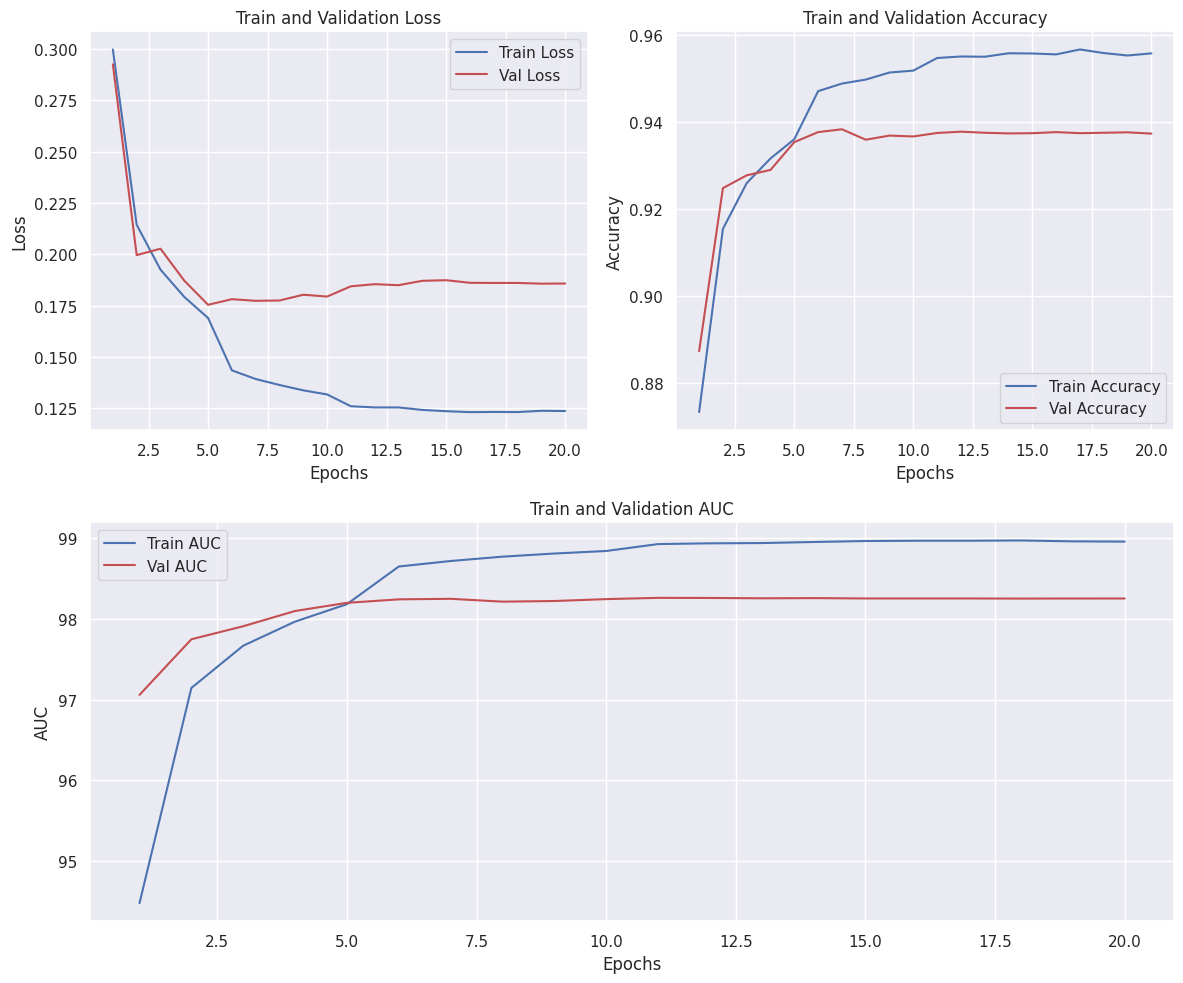

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU